In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# parameters
learning_rate = 0.001
training_epoches = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder(tf.float32,[None, 784])
Y = tf.placeholder(tf.float32,[None, 10])


with tf.name_scope('layer1') as scope:
    W1 = tf.Variable(tf.random_normal([784,256]))
    b1 = tf.Variable(tf.random_normal([256]))
    L1 = tf.nn.relu(tf.matmul(X,W1) + b1)
    
    w1_hist = tf.summary.histogram("weights1",W1)
    b1_hist = tf.summary.histogram("biases1",b1)
    l1_hist = tf.summary.histogram("layer1",L1)

    
with tf.name_scope('layer2') as scope:
    W2 = tf.Variable(tf.random_normal([256,256]))
    b2 = tf.Variable(tf.random_normal([256]))
    L2 = tf.nn.relu(tf.matmul(L1,W2) + b2)
    
    w2_hist = tf.summary.histogram("weights1",W2)
    b2_hist = tf.summary.histogram("biases1",b2)
    l2_hist = tf.summary.histogram("layer1",L2)

    
with tf.name_scope('layer3') as scope:
    W3 = tf.Variable(tf.random_normal([256,10]))
    b3 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L2,W3) + b3
    
    w3_hist = tf.summary.histogram("weights1",W3)
    b3_hist = tf.summary.histogram("biases1",b3)
    hypothesis_hist = tf.summary.histogram("hypothesis",hypothesis)

In [4]:
with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=hypothesis,labels=Y))
    cost_summ = tf.summary.scalar("cost",cost)

with tf.name_scope("train") as scope:
    optimizer = tf.train.AdamOptimizer(
        learning_rate=learning_rate).minimize(cost)
   

    

In [10]:
sess = tf.Session()

merged_summery = tf.summary.merge_all()
writer = tf.summary.FileWriter("./logsForMNIST/logs_r0_001_")
writer.add_graph(sess.graph)

sess.run(tf.global_variables_initializer())

for epoch in range(training_epoches):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs,Y: batch_ys}
        summery, c, _ = sess.run([merged_summery, cost, optimizer],feed_dict=feed_dict)
        writer.add_summary(summery,global_step=epoch*total_batch+i)
        
        avg_cost += c / total_batch
                     
    print('Epoch:','%04d'%(epoch+1),'cost = ','{:.09}'.format(avg_cost)) ## error{}
print('\nLearning finished!\n')  


Epoch: 0001 cost =  152.098599
Epoch: 0002 cost =  39.9190258
Epoch: 0003 cost =  24.9944369
Epoch: 0004 cost =  17.2869337
Epoch: 0005 cost =  12.4344874
Epoch: 0006 cost =  9.19472219
Epoch: 0007 cost =  6.76840244
Epoch: 0008 cost =  4.9698201
Epoch: 0009 cost =  3.6716582
Epoch: 0010 cost =  2.75220056
Epoch: 0011 cost =  2.06551155
Epoch: 0012 cost =  1.46954997
Epoch: 0013 cost =  1.19937155
Epoch: 0014 cost =  0.938229955
Epoch: 0015 cost =  0.739508241

Learning finished!



In [6]:
#InternalError: Failed to create session.
sess = tf.Session()

### test model and check accuracy

In [11]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#accuracy_summ = tf.summary.scalar("accuracy",accuracy)
print('Accuracy:',sess.run(accuracy,feed_dict={X: mnist.test.images, 
                                             Y: mnist.test.labels}))

Accuracy: 0.9436


### get one picture, predict then draw a picture

In [12]:
r = random.randint(0,mnist.test.num_examples - 1)
mnist_test = mnist.test
label = mnist_test.labels[r:r+1]
image = mnist_test.images[r:r+1]
print("Label:", sess.run(tf.argmax(label,1)))
print("Prediction:",sess.run(
      tf.argmax(hypothesis,1),feed_dict={X:image}))

Label: [1]
Prediction: [1]


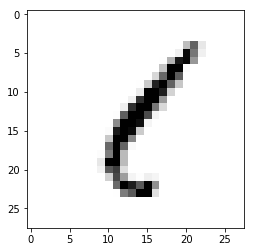

In [13]:
plt.imshow(image.reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

In [6]:
x = range(0,10)
print(x.start)


0
